1. Temperature anomaly plots 

Download the following global temperature anomaly datasets in CSV format from https://data.giss.nasa.gov/gistemp/:

Combined Land-Surface Air and Sea-Surface Water Temperature Anomalies:
 “Global-mean monthly, seasonal, and annual means, 1880-present, updated through most recent month”

AIRS v6 and AIRS v7 Temperature Anomalies:
“Global-mean monthly, seasonal, and annual means, 2002-present, updated through most recent month” 

AIRS stands for Atmospheric Infrared Sounder and is a satellite based measure. Use the AIRS v6 data.

Note from NOAA on why global averages are given as anomalies and not absolute temperatures: 
Using reference values computed on smaller (more local) scales over the same time period establishes a baseline from which anomalies are calculated. This effectively normalizes the data so they can be compared and combined to more accurately represent temperature patterns with respect to what is normal for different places within a region.
For these reasons, large-area summaries incorporate anomalies, not the temperature itself. Anomalies more accurately describe climate variability over larger areas than absolute temperatures do, and they give a frame of reference that allows more meaningful comparisons between locations and more accurate calculations of temperature trends.

Plot the annual (J-D) anomalies from these two datasets together on the same (labeled) x and y axes. Use information from the NASA website to explain why the AIRS values are lower than the land and sea surface data. 

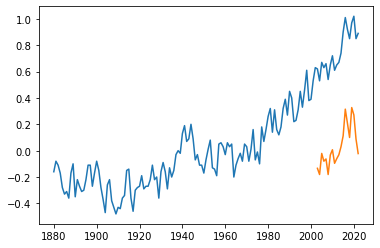

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap

df_1880 = pd.read_csv('GLB.Ts+dSST1880.csv', skiprows=1)
df_2002 = pd.read_csv('GLB.Ts+dSST2002.csv', skiprows = [0,2], skipfooter=46, engine='python')
plt.plot(df_1880['Year'], df_1880['J-D'])
plt.plot(df_2002['Year'], df_2002['J-D'])
#display plot
plt.show()

The AIRS dataset uses the Atmospheric Infrared Sounder (AIRS) which takes measurements of infrared radiation from the atmosphere and converts them into the quantities of temperature. Atmospheric temperatures decrease as height increases and are generally lower than surface level temperatures on land and sea. Thus, the anomaly values for the AIRS dataset are lower than that of the surface level data set because the measurements are lower. Additionally, the baseline years are different for the two datasets as the surface level data makes comparisons to the average temperature over the period 1951-1980. The AIRS data makes comparisons to the Corresponding L-OTI (Land-Ocean Temperature Index) anomaly data for 2007-2016. The temperature for the time period used by the AIRS dataset is greater than that of the Land and Surface dataset which is a reason that the anomalies are lower for the airs dataset (because the baseline to compare to is higher).

2. Climate stripes

“Climate stripes” or “warming stripes” have become an international artistic sign of climate concern: https://en.wikipedia.org/wiki/Warming_stripes . 

Use the land and sea surface data (first dataset from Q1) to replicate this visualization with temperature anomalies. Your results should use the same blue-red color scheme and the figure width:height ratio should be no greater than 5:1 so that the stripe colors are clearly visible. Don't include ticks or tick labels on the axes; the plot should be just the stripes. 

(0.0, 143.0)

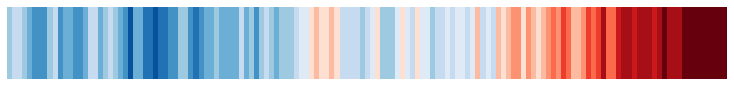

In [10]:
LIM = 0.7 # degrees

anomaly = df_1880['J-D'].dropna()
reference = anomaly.mean()
cmap = ListedColormap([
    '#08306b', '#08519c', '#2171b5', '#4292c6',
    '#6baed6', '#9ecae1', '#c6dbef', '#deebf7',
    '#fee0d2', '#fcbba1', '#fc9272', '#fb6a4a',
    '#ef3b2c', '#cb181d', '#a50f15', '#67000d',
])

fig = plt.figure(figsize=(10, 1))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()

# create a collection with a rectangle for each year

col = PatchCollection([
    Rectangle((y, 0), 1, 1)
    for y in range(0, 142 + 1)
])

col.set_array(anomaly)
col.set_cmap(cmap)
col.set_clim(reference - LIM, reference + LIM)
ax.add_collection(col)

ax.set_ylim(0, 1)
ax.set_xlim(0, 142 + 1)

3. Carbon per year 

Get the “Globally averaged marine surface annual mean data” (CSV) here: https://gml.noaa.gov/ccgg/trends/gl_data.html
and use it to write a function that returns the average amount of carbon (ppm) in the atmosphere for a given year (averaged over months). 

Use your function to find the average for the year you were born and for the year I was born (1989). Which one is higher? 


In [5]:
def avg_carbon(df, year):
    print("Average carbon for year (" + str(year) + ") is:", df.loc[df['year'] == year]['mean'].to_string(index=False))
data = pd.read_csv('co2_annmean_gl.csv', skiprows=54)
avg_carbon(data, 2001)
avg_carbon(data, 1989)

Average carbon for year (2001) is: 370.57
Average carbon for year (1989) is: 352.79


The average amount of carbon in the atmosphere is greater for the year I was born than for the year the profressor was born (1989).